In [1]:
from numba import jit
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy.io as sio
from Bio import SeqIO
import yfinance as yf
import numpy as np
from numba import njit,jit
import sys
from matplotlib import ticker
import matplotlib.pyplot as plt
from scipy.special import betainc, hyp2f1, gamma
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
font = {'size': 30, 'weight':'normal'}
plt.rc('font', **font)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "text.latex.preamble": r"\usepackage{amssymb}",
})
rng = np.random.default_rng(seed=42)
colors = [['blue',"slateblue"], ['darkgoldenrod', "goldenrod"], ['red', "indianred",], ['olivedrab', "yellowgreen"], ['plum',"pink"], ['black','dimgray'], ['orangered','coral'] ]

locminx = ticker.LogLocator(base=10.0,subs=np.linspace(0,1,11),numticks=12)
locmajx = ticker.LogLocator(base=10,numticks=12) 
locminy = ticker.LogLocator(base=10.0,subs=np.linspace(0,1,11),numticks=12)
locmajy = ticker.LogLocator(base=10,numticks=12) 
from collections import Counter

def modlin(x,a,b):
    return a*x+b

def finv(x,a):
    return a/x

@jit(nopython=True)
def Splitt(V):
    T=[]
    m,M, pos=min(V[0],V[1 ]),max(V[0],V[1]),0
    if V[1]>V[0]:
        pos=1
    else:
        pos=-1
    for k in range(2,len(V)):
        if V[k]>M and pos==1:
            T.append(0)
            pos=1
        elif V[k]<m and pos==-1:
            T.append(0)
            pos=-1
        elif V[k]>M and pos==-1:
            T.append(1)
            pos=1
        elif V[k]<m and pos==1:
            T.append(1)
            pos=-1
        M=max(V[k],M)
        m=min(V[k],m)
    return T

@jit(nopython=True)
def Splitt_alt(V0):
    # center the trajectory at its origin
    V=V0-V0[0]
    T=[]
    m,M, pos=min(V[0],V[1 ]),max(V[0],V[1]),0
    if V[1]>V[0]:
        pos=1
    else:
        pos=-1
    seen_zero = 0
    for k in range(2,len(V)):
        # if we crossed zero, we are on opposite side from the last visited side pos
        if (not seen_zero) and (pos*V[k]<0):
            seen_zero=1
        if V[k]>M:
            T.append(seen_zero)
            seen_zero = 0
            pos=1
        if V[k]<m:
            T.append(seen_zero)
            seen_zero = 0
            pos=-1
        
        M=max(V[k],M)
        m=min(V[k],m)
    return T

# Microspheres
See paper Nature Comm, data given by someone to thank for (see Ref 26),  D. Krapf, M. Weiss, F. Taheri and
C. Selhuber-Unkel

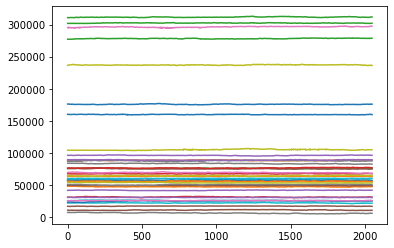

In [5]:
px=np.loadtxt('Data/Trajectories_beads_agarose.txt')
Traj=np.array([px[:,k] for k in range(len(px[0]))])

for k in range(len(Traj)):
  plt.plot(Traj[k])
plt.show()
H=0.43

40
2049


(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

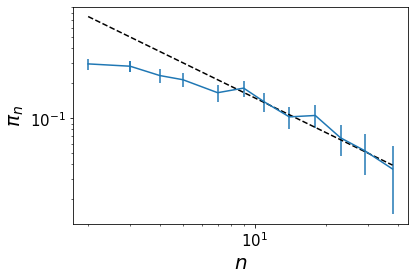

In [8]:
T=[]
Max=0

epochs=20 #20 equally spaced start for the trajectory
print(len(Traj))  #40 trajectories
print(len(Traj[0])) #Length of trajectory

for m in range(epochs-1): 
  for k in range(len(Traj)):
    window=len(Traj[k])//epochs
    #print(window)
    Size=Splitt(Traj[k][window*m:])
    T.append(Size[:])
    Max=max(len(Size),Max)
    
Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
        
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(0.25,np.log10(Max)-0.1,15))
Ind=Ind[p[Ind]>yerr[Ind]*1.5]

plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind])
plt.plot(n[Ind],1.5/n[Ind],'--k')


plt.semilogx()
plt.semilogy()

plt.ylabel(r'$\pi_n$',fontsize=20)
plt.xlabel(r'$n$',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# DNA RW HUMBMYH7
From the GenBank website, look at Nature Commun paper for more on this dataset

M57965.2


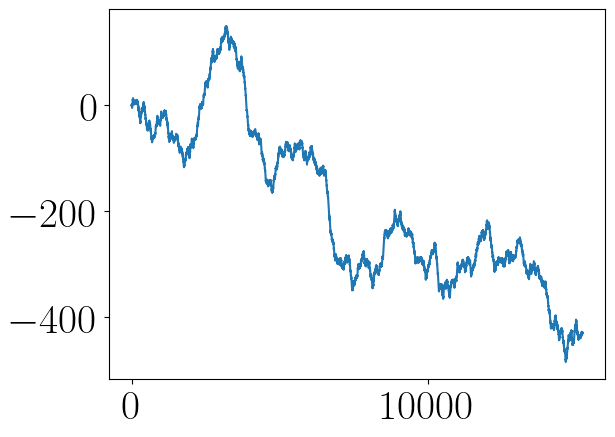

In [2]:
for seq_record in SeqIO.parse("Data/HUMBMYH7.gb","genbank"): 
    print(seq_record.id)
    #print(seq_record.seq)
    #print(len(seq_record.seq))
u=[0]
st=str(seq_record.seq)
for s in st:
    # if s in ['A','G']:
    #     u.append(u[-1]-1.)
    # else:
    #     u.append(u[-1]+1.)
    if s in ['C']:
        u.append(u[-1]-1.)
    elif s in ['G']:
        u.append(u[-1]+1.)

Values=np.array(u)

X=np.arange(len(Values))


a,b=curve_fit(modlin,X,Values)[0]
a,b=0,0

# Values=Values-modlin(X,a,b) #Remove the bias

plt.plot(X,Values)
plt.show()

12
12
[0.44616749] [[0.0002393]]
37
37
[0.46283031] [[0.000582]]


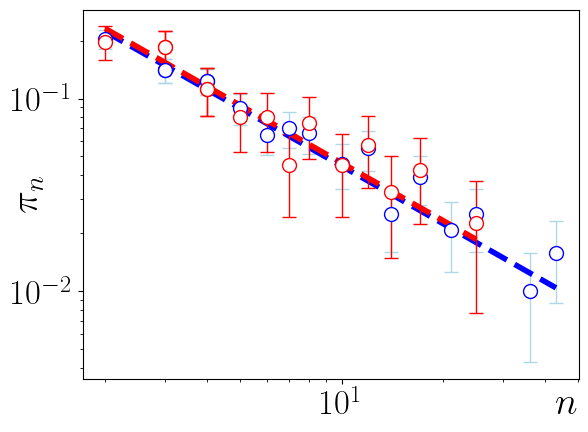

In [ ]:
T=[]
Max=0

T=[]
epochs=1200
print(len(Values)//epochs)
window=len(Values)//epochs
print(window)
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
    Max=max(len(Size),Max)
    T.append(Size[:])

    Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.2,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]
fig, ax = plt.subplots(1, 1)
plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)

A,var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
print(A,var)
plt.plot(n[Ind],A/n[Ind],'--',linewidth=4,color= 'blue')

T=[]
Max=0

T=[]
epochs=400
print(len(Values)//epochs)
window=len(Values)//epochs
print(window)
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
    Max=max(len(Size),Max)
    T.append(Size[:])

    Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.2,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]
plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='red',
    ecolor='red',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)

A,var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
print(A,var)
plt.plot(n[Ind],A/n[Ind],'--',linewidth=4, color='red')

plt.semilogx()
plt.semilogy()
plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25)
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='right')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/GenomicBMYH7_SI.pdf', dpi=600, bbox_inches='tight')

# DNA RW HUMTCRA
From the GenBank website, look at Nature Commun paper for more on this dataset

M94081.1


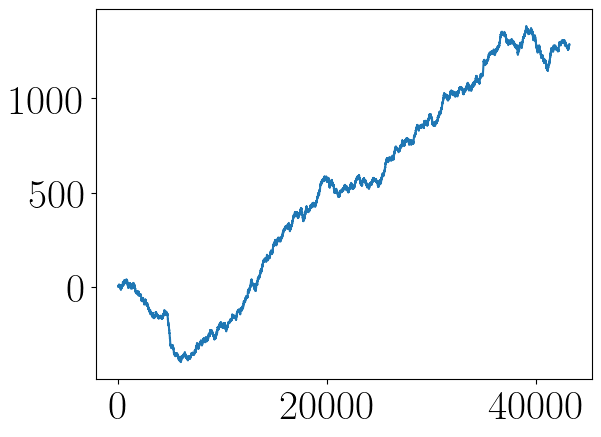

In [6]:
for seq_record in SeqIO.parse("Data/HUMTCRADCV.gb","genbank"): #"HHUMHBB.gb","genbank"
    print(seq_record.id)
    #print(seq_record.seq)
    #print(len(seq_record.seq))
u=[0]
st=str(seq_record.seq)
for s in st:
    # if s in ['A','G','H','X']:
    #     u.append(u[-1]-1.)
    # else:
    #     u.append(u[-1]+1.)
    if s in ['C']:
        u.append(u[-1]-1.)
    elif s in ['G']:
        u.append(u[-1]+1.)

Values=np.array(u)


X=np.arange(len(Values))

a,b=curve_fit(modlin,X,Values)[0]
a,b=0,0

Values=Values-modlin(X,a,b)

plt.plot(Values)
plt.show()

35
35
[0.53341511] [[0.00055395]]
107
107
[0.46860826] [[0.00077073]]


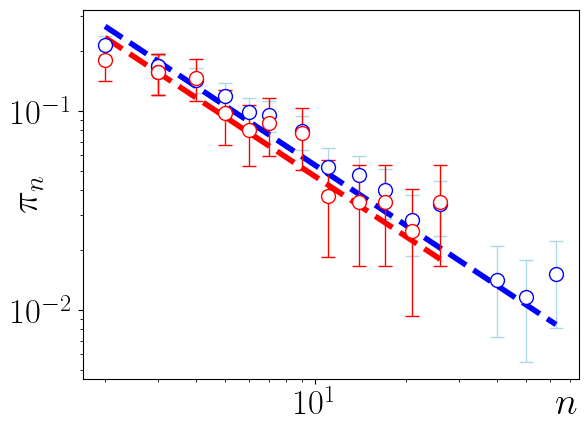

In [7]:
T=[]
Max=0

T=[]
epochs=1200
print(len(Values)//epochs)
window=len(Values)//epochs
print(window)
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
    Max=max(len(Size),Max)
    T.append(Size[:])

    Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.2,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]
fig, ax = plt.subplots(1, 1)
plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)

A,var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
print(A,var)
plt.plot(n[Ind],A/n[Ind],'--',linewidth=4,color= 'blue')

T=[]
Max=0

T=[]
epochs=400
print(len(Values)//epochs)
window=len(Values)//epochs
print(window)
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
    Max=max(len(Size),Max)
    T.append(Size[:])

    Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.2,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]
plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='red',
    ecolor='red',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)

A,var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
print(A,var)
plt.plot(n[Ind],A/n[Ind],'--',linewidth=4, color='red')

plt.semilogx()
plt.semilogy()
plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25)
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='right')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/GenomicHUMCTRA_SI.pdf', dpi=600, bbox_inches='tight')

# Intra-cellular vacuoles in Amoeba
See paper Nature Comm, data given by someone to thank for (see Ref 26),  D. Krapf, M. Weiss, F. Taheri and
C. Selhuber-Unkel

In [48]:
Traj=[[]]
for s in ['1','2a','3','4','5','7','8','9','11']:
  test=sio.loadmat('Data/Amoeba_Data/Amoeba'+s+'_vac_tracks.mat')
  X=test['track4xml'][:,0]
  Y=X=test['track4xml'][:,1]  
  T=test['track4xml'][:,4]
  Traj[-1].append(X[0])
  for k in range(1,len(X)):
        if T[k]!=T[k-1]:
            Traj.append([])
        Traj[-1].append(X[k])
  Traj.append([])
  Traj[-1].append(Y[0])
  for k in range(1,len(Y)):
        if T[k]!=T[k-1]:
            Traj.append([])
        Traj[-1].append(Y[k])
        
Trajf=[]
for p in Traj:
    if len(p)>2048:
        Trajf.append(np.array(p[:2048][:])) #Select only trajectories long enough
Traj=Trajf[:]
P=np.array(Traj) # In this dataset: multiple trajectories

205
2048
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1

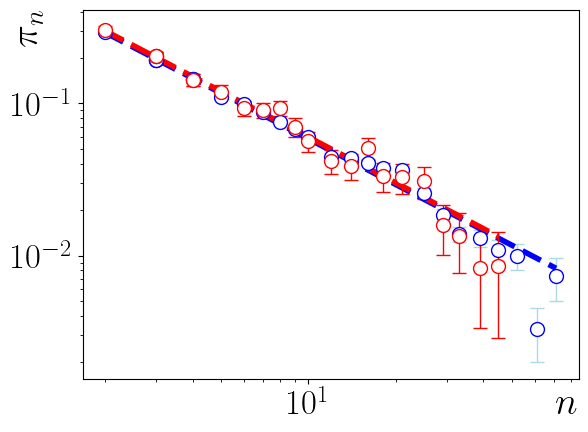

In [50]:
H=0.67

T=[]
Max=0


fig, ax = plt.subplots(1, 1)
print(len(P))
print(len(P[0]))
epochs=200
for m in range(epochs-1): 
  for k in range(len(P)): #for each trajectory
    window=len(P[k])//epochs
    print(window)
    #print(window)
    Size=Splitt(P[k][window*m:])
    T.append(Size[:])
    Max=max(len(Size),Max)
    
Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]

plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)

A = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])[0][0]
plt.plot(n[Ind],A/n[Ind],'--',linewidth=4,color='blue')
print(A,n[Ind])

plt.semilogx()
plt.semilogy()

# ax.text(3, 0.01, rf'Amoeba', fontsize=22)

plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25,loc='top')
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='right')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
T=[]
print(len(P))
print(len(P[0]))
epochs=15
for m in range(epochs-1): 
  for k in range(len(P)): #for each trajectory
    window=len(P[k])//epochs
    print(window)
    #print(window)
    Size=Splitt(P[k][window*m:])
    T.append(Size[:])
    Max=max(len(Size),Max)
    
Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]

plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='red',
    ecolor='red',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)

A = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])[0][0]
plt.plot(n[Ind],A/n[Ind],'--',linewidth=4,color='red')
print(A,n[Ind])

plt.semilogx()
plt.semilogy()

# ax.text(3, 0.01, rf'Amoeba', fontsize=22)

plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25,loc='top')
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='right')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/Amoeba_SI.pdf', dpi=600, bbox_inches='tight')

# Ethernet cumulative traffic
See more on this dataset in Nature Commun paper records

999999


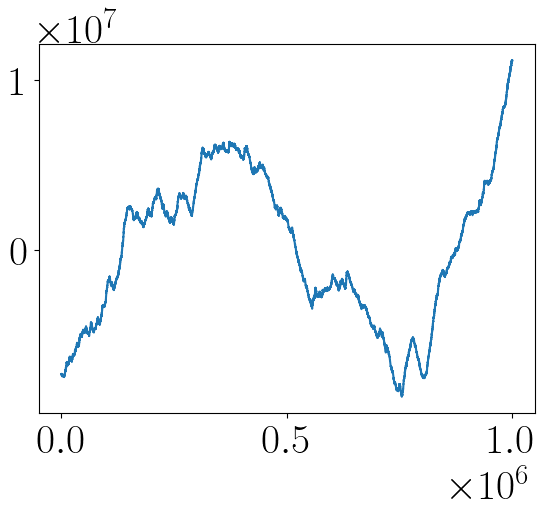

In [70]:
H=0.81


l=pd.read_csv('Data/BC-pAug89.csv')
Dates=[]
Values=[]

def sep(l):
    s1,s2='',''
    k=0
    while l[k]==' ':
        k+=1
    while l[k]!=' ':
        s1+=l[k]
        k+=1
    while l[k]==' ':
        k+=1
    while l[k]!=' ':
        s2+=l[k]
        k+=1
    return s1,s2

u=0
for k in l:
    for i in range(len(l[k])):
        s1,s2=sep(l[k][i])
        Dates.append(float(s1))
        Values.append(int(s2))
    u+=1

    
Values=np.cumsum(Values)
X=np.arange(len(Values))


a,b=curve_fit(modlin,X,Values)[0]

Values=Values-modlin(X,a,b)    
    


plt.plot(Values)
P=Values
print(len(Values))

833
833
[0.2256555] [[0.00059011]]
333
333
[0.23756069] [[0.00040536]]


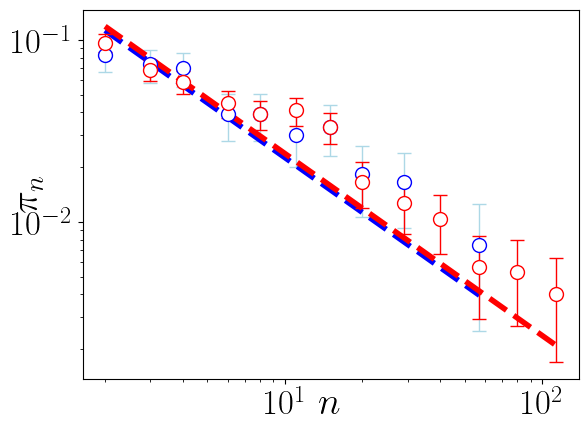

In [71]:
T=[]
Max=0

T=[]
epochs=1200
print(len(Values)//epochs)
window=len(Values)//epochs
print(window)
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
    Max=max(len(Size),Max)
    T.append(Size[:])

    Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.2,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]
fig, ax = plt.subplots(1, 1)
plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)

A,var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
print(A,var)
plt.plot(n[Ind],A/n[Ind],'--',linewidth=4,color= 'blue')

T=[]
Max=0

T=[]
epochs=3000
print(len(Values)//epochs)
window=len(Values)//epochs
print(window)
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
    Max=max(len(Size),Max)
    T.append(Size[:])

    Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.2,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]
plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='red',
    ecolor='red',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)

A,var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
print(A,var)
plt.plot(n[Ind],A/n[Ind],'--',linewidth=4, color='red')

plt.semilogx()
plt.semilogy()
plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25)
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='center')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/ethernet_SI.pdf', dpi=600, bbox_inches='tight')

# Single cell patient 1
Data from the following paper https://www.nature.com/articles/s42003-020-01605-w#Sec18. They have 12 patients of different ages for which they study the motility of their cells.

[  0  81  80  68  30  68 105  91  96  69  51  60  61]


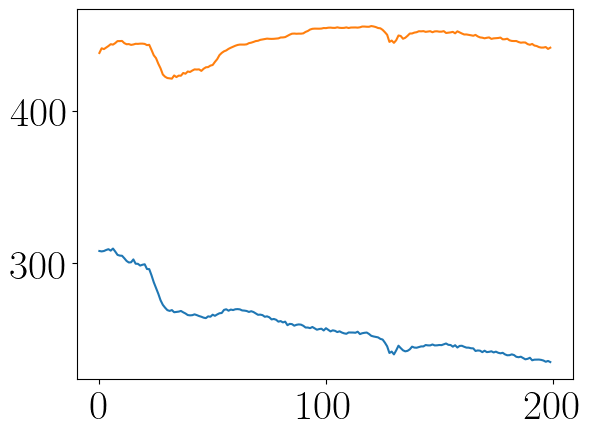

In [52]:
TRAJ=[]
L=np.loadtxt('Data/42003_2020_1605_MOESM5_ESM.txt')
Ncells=np.arange(13)*0
Ncells[1]+=1

for k in range(1,len(L)):
    if L[k][1]!=L[k-1][1]:
        Ncells[np.int64(L[k][0])]+=1
print(Ncells)

Seen=0
for m in range(1,13):
    Traj=[]
    for k in range(Ncells[m]):
        Traj.append([])
        Traj.append([])
        for l in range(200):
            Traj[-1].append(L[Seen+k*200+l][-1])
            Traj[-2].append(L[Seen+k*200+l][-2])
            #if np.abs(L[Seen+k*200+l][-1]-L[Seen+k*200+l-1][-1])>10:
                #print(Seen+k*200+l)
        #Traj[-1]=np.array(Traj[-1])-np.mean(np.array(Traj[-1][1:])-np.array(Traj[-1][:-1]))*np.arange(len(Traj[-1]))
        #Traj[-2]=np.array(Traj[-2])-np.mean(np.array(Traj[-2][1:])-np.array(Traj[-2][:-1]))*np.arange(len(Traj[-2]))
    Seen+=Ncells[m]*200
    TRAJ.append(Traj[:])

    
Patient=0
Trajindex=10
plt.plot(TRAJ[Patient][Trajindex])
plt.plot(TRAJ[Patient][Trajindex+1])

40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
4

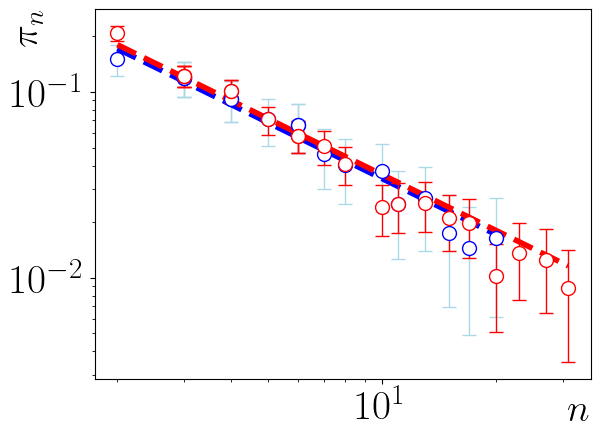

In [53]:
Traj=np.array(TRAJ[0])
T=[]
Max=0
fig, ax = plt.subplots(1, 1)
epochs=5
# print(len(Traj))
# print(len(Traj[0]))

for m in range(epochs-1): 
  for k in range(len(Traj)):
    window=len(Traj[k])//epochs
    print(window)
    Size=Splitt(Traj[k][window*m:])
    T.append(Size[:])
    Max=max(len(Size),Max)
    
Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>yerr[Ind]*1.5]


plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])[0][0]
plt.plot(n[Ind],A/n[Ind],'--',color='blue', linewidth=4)
print(A)
plt.semilogx()
plt.semilogy()

epochs=12
# print(len(Traj))
# print(len(Traj[0]))
T=[]
for m in range(epochs-1): 
  for k in range(len(Traj)):
    window=len(Traj[k])//epochs
    print(window)
    Size=Splitt(Traj[k][window*m:])
    T.append(Size[:])
    Max=max(len(Size),Max)
    
Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>yerr[Ind]*1.5]


plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='red',
    ecolor='red',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])[0][0]
plt.plot(n[Ind],A/n[Ind],'--',color='red' ,linewidth=4)
print(A)
plt.semilogx()
plt.semilogy()

# ax.text(3, 0.005, rf'Single cell P1', fontsize=22)

plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25,loc='top')
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='right')
from matplotlib.ticker import LogLocator, LogFormatter,LogFormatterMathtext


ax.set_xscale('log')
ax.set_yscale('log')
# Major ticks at decades only
ax.xaxis.set_major_locator(LogLocator(base=10.0))  
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10.0, labelOnlyBase=True))

# Minor ticks (keep them unlabeled)
# ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=range(2, 18)))
ax.xaxis.set_minor_formatter(lambda *_: "")

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/CellP1_SI.pdf', dpi=600, bbox_inches='tight')

# Single cell patient 12
Data from the following paper https://www.nature.com/articles/s42003-020-01605-w#Sec18. They have 12 patients of different ages for which they study the motility of their cells.

40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
4

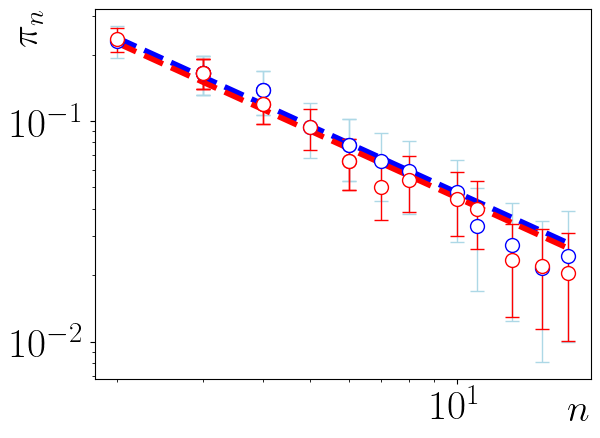

In [54]:
T=[]
Max=0

Traj=np.array(TRAJ[11])

T=[]
Max=0
fig, ax = plt.subplots(1, 1)
epochs=5
# print(len(Traj))
# print(len(Traj[0]))

for m in range(epochs-1): 
  for k in range(len(Traj)):
    window=len(Traj[k])//epochs
    print(window)
    Size=Splitt(Traj[k][window*m:])
    T.append(Size[:])
    Max=max(len(Size),Max)
    
Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>yerr[Ind]*1.5]


plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])[0][0]
plt.plot(n[Ind],A/n[Ind],'--',color='blue', linewidth=4)
print(A)
plt.semilogx()
plt.semilogy()

epochs=8
# print(len(Traj))
# print(len(Traj[0]))
T=[]
for m in range(epochs-1): 
  for k in range(len(Traj)):
    window=len(Traj[k])//epochs
    print(window)
    Size=Splitt(Traj[k][window*m:])
    T.append(Size[:])
    Max=max(len(Size),Max)
    
Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>yerr[Ind]*1.5]


plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='red',
    ecolor='red',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])[0][0]
plt.plot(n[Ind],A/n[Ind],'--',color='red' ,linewidth=4)
print(A)
plt.semilogx()
plt.semilogy()

# ax.text(3, 0.005, rf'Single cell P1', fontsize=22)

plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25,loc='top')
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='right')
from matplotlib.ticker import LogLocator, LogFormatter,LogFormatterMathtext


ax.set_xscale('log')
ax.set_yscale('log')
# Major ticks at decades only
ax.xaxis.set_major_locator(LogLocator(base=10.0))  
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10.0, labelOnlyBase=True))

# Minor ticks (keep them unlabeled)
# ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=range(2, 18)))
ax.xaxis.set_minor_formatter(lambda *_: "")

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/CellP12_SI.pdf', dpi=600, bbox_inches='tight')

# SPX index
Classical financial data to analyze. Are downloadable on yahoo finance. Can update the date up to which you download the data.
IMPORTANT : $n$ is the number of distinct level prices. After logarithmic transform to suppress the exponential drift, $n$ is STILL the number of distinct log-indices. But $n$ cannot be interpreted as the 'size' of the visited interval.

[*********************100%***********************]  1 of 1 completed

[1.56525734 1.56133992 1.55047296 ... 3.77815341 3.77917136 3.77843924]
0.0001203864111254908 1.4966885610233347


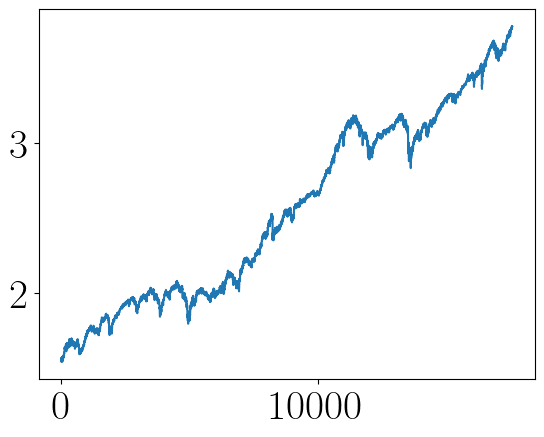

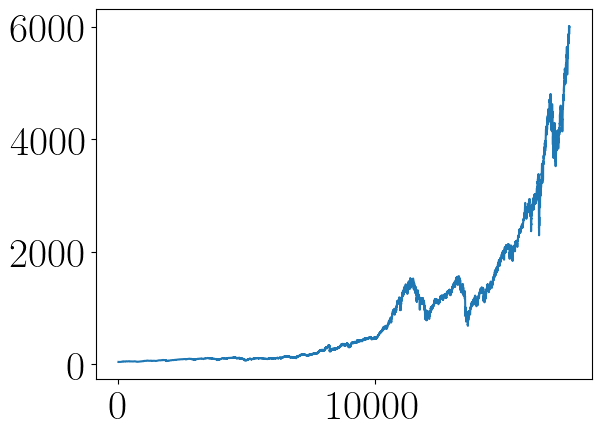

In [68]:
data = yf.download(tickers = "^GSPC", start = "1955-01-01", 
                              end = "2024-11-30", interval = "1d",auto_adjust=True)
data=np.array(data['Open'])
# print(data)


Values=np.array([np.log10(data[k][0]) for k in range(len(data))])
Valuesexp=np.array([data[k][0] for k in range(len(data))])
X=np.arange(len(Values))

print(Values)
a,b=curve_fit(modlin,X,Values)[0]
print(a,b)

# Values=Values-modlin(X,a,b)
# Values = np.diff(Values, 1)
plt.plot(Values)
plt.show()
plt.plot(Valuesexp)
plt.show()

17
window=17
1000
[0.5957434] [[0.00128881]]
8
window=8
2000
[0.664643] [[0.00073489]]


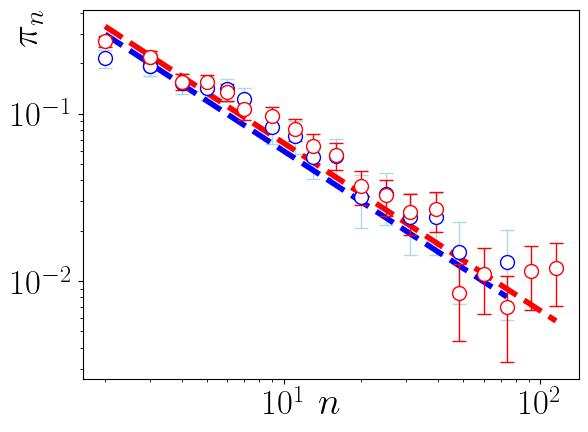

In [69]:
T=[]
Max=0

fig, ax = plt.subplots(1, 1)

epochs=1000
print(len(Values)//epochs)
window=len(Values)//epochs
print(f"window={window}")
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
   
    Max=max(len(Size),Max)
    # print(len(Size[:]))
    T.append(Size[:])

Pi_n=np.zeros(Max)
C_n=np.zeros(Max)
print(f"{len(T)}")

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]

plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A, var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
plt.plot(n[Ind],A/n[Ind],'--',color='blue', linewidth=4)
print(A,var)

epochs=2000
print(len(Values)//epochs)
window=len(Values)//epochs
print(f"window={window}")
T=[]
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
   
    Max=max(len(Size),Max)
    # print(len(Size[:]))
    T.append(Size[:])

Pi_n=np.zeros(Max)
C_n=np.zeros(Max)
print(f"{len(T)}")

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]

plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='red',
    ecolor='red',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A, var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
plt.plot(n[Ind],A/n[Ind],'--',color='red',linewidth=4)
print(A,var)

plt.semilogx()
plt.semilogy()

# ax.text(3, 0.05, rf'SPX Index', fontsize=22)

plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25,loc='top')
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='center')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/SPX_SI.pdf', dpi=600, bbox_inches='tight')

# N225
Classical financial data to analyze. Are downloadable on yahoo finance. Can update the date up to which you download the data.

[*********************100%***********************]  1 of 1 completed

6.76616173633594e-05 3.519013442360223


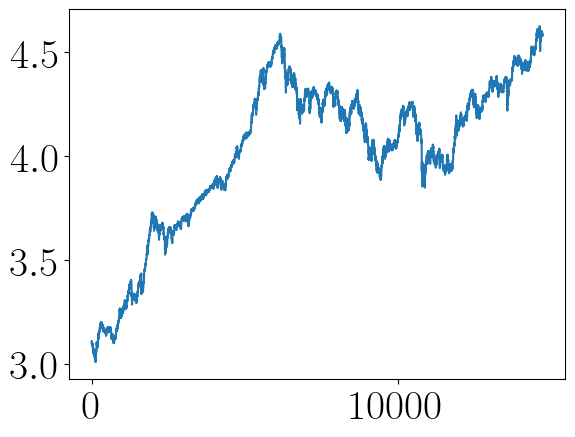

In [66]:
data = yf.download("^N225", start="1955-01-01", end="2024-11-30",interval="1d")
data=np.array(data['Open'])


Values=np.array([np.log10(data[k][0]) for k in range(len(data))])
X=np.arange(len(Values))


a,b=curve_fit(modlin,X,Values)[0]
print(a,b)
a,b=0,0


Values=Values-modlin(X,a,b)
plt.plot(Values)

29
window=29
500
[0.60054414] [[0.00062829]]
7
window=7
2000
[0.63876388] [[0.00057325]]


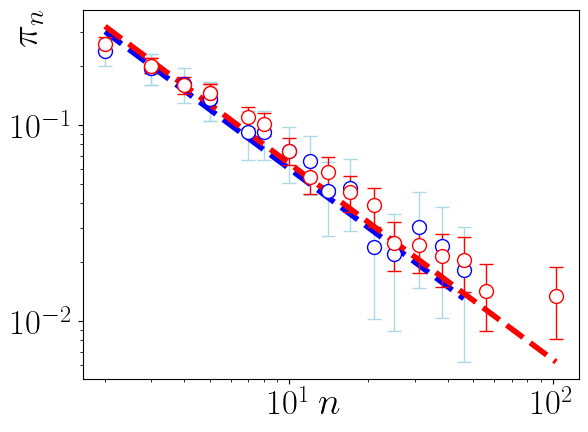

In [67]:
T=[]
Max=0

fig, ax = plt.subplots(1, 1)

epochs=500
print(len(Values)//epochs)
window=len(Values)//epochs
print(f"window={window}")
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
   
    Max=max(len(Size),Max)
    # print(len(Size[:]))
    T.append(Size[:])

Pi_n=np.zeros(Max)
C_n=np.zeros(Max)
print(f"{len(T)}")

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]

plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A, var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
plt.plot(n[Ind],A/n[Ind],'--',color='blue', linewidth=4)
print(A,var)

epochs=2000
T=[]
print(len(Values)//epochs)
window=len(Values)//epochs
print(f"window={window}")
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
   
    Max=max(len(Size),Max)
    # print(len(Size[:]))
    T.append(Size[:])

Pi_n=np.zeros(Max)
C_n=np.zeros(Max)
print(f"{len(T)}")

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]

plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='red',
    ecolor='red',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A, var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
plt.plot(n[Ind],A/n[Ind],'--',color='red',linewidth=4)
print(A,var)

plt.semilogx()
plt.semilogy()

# ax.text(3, 0.05, rf'SPX Index', fontsize=22)

plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25,loc='top')
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='center')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/N225_SI.pdf', dpi=600, bbox_inches='tight')

# DowJones

[*********************100%***********************]  1 of 1 completed

0.00011250541388162345 3.6202767424935676


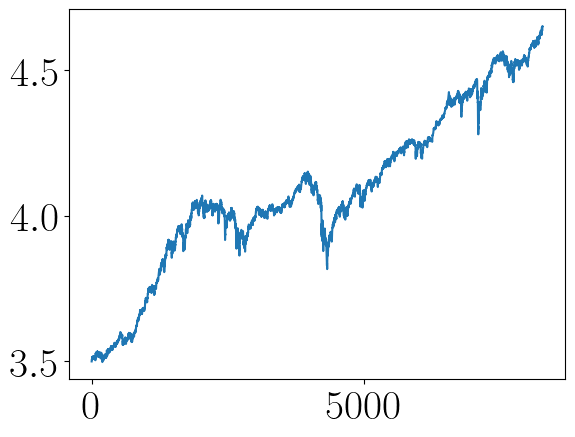

In [61]:
data = yf.download("^DJI", start="1955-01-01", end="2024-11-30",interval="1d")
data=np.array(data['Open'])


Values=np.array([np.log10(data[k][0]) for k in range(len(data))])
X=np.arange(len(Values))


a,b=curve_fit(modlin,X,Values)[0]
print(a,b)
a,b=0,0


Values=Values-modlin(X,a,b)
plt.plot(Values)

41
window=41
200
[0.6535941] [[0.00148344]]
8
window=8
1000
[0.67235108] [[0.00104659]]


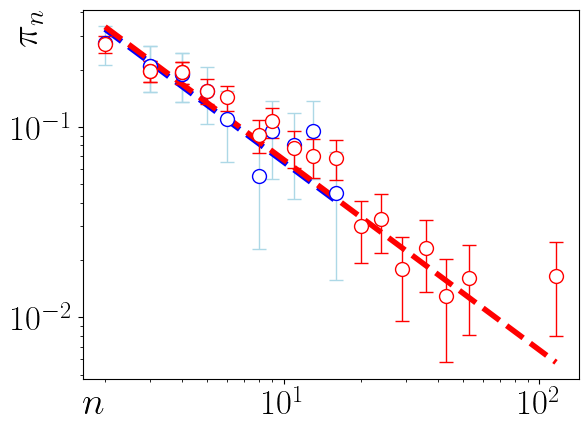

In [65]:
T=[]
Max=0

fig, ax = plt.subplots(1, 1)

epochs=200
print(len(Values)//epochs)
window=len(Values)//epochs
print(f"window={window}")
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
   
    Max=max(len(Size),Max)
    # print(len(Size[:]))
    T.append(Size[:])

Pi_n=np.zeros(Max)
C_n=np.zeros(Max)
print(f"{len(T)}")

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]

plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A, var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
plt.plot(n[Ind],A/n[Ind],'--',color='blue', linewidth=4)
print(A,var)

epochs=1000
T=[]
print(len(Values)//epochs)
window=len(Values)//epochs
print(f"window={window}")
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
   
    Max=max(len(Size),Max)
    # print(len(Size[:]))
    T.append(Size[:])

Pi_n=np.zeros(Max)
C_n=np.zeros(Max)
print(f"{len(T)}")

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(1,Max+1)
Ind=np.int64(np.logspace(.25,np.log10(Max)-.1,30))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]

plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='red',
    ecolor='red',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A, var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
plt.plot(n[Ind],A/n[Ind],'--',color='red',linewidth=4)
print(A,var)

plt.semilogx()
plt.semilogy()

# ax.text(3, 0.05, rf'SPX Index', fontsize=22)

plt.ylabel(r'$\pi_n$',fontsize=28,labelpad=-25,loc='top')
plt.xlabel(r'$n$',fontsize=28,labelpad=-25,loc='left')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/DowJones_SI.pdf', dpi=600, bbox_inches='tight')

# BONUS: study of scale invariance for Single cell patients

[  0  81  80  68  30  68 105  91  96  69  51  60  61]
0.7883214850155082


C:\Users\julie\AppData\Local\Temp\ipykernel_404\3081470951.py:86: RuntimeWarning: divide by zero encountered in log10
  x,y=np.log10(n_lis)[5:],np.log10(Sig)[5:]


Text(0, 0.5, '$F(\\ell) $')

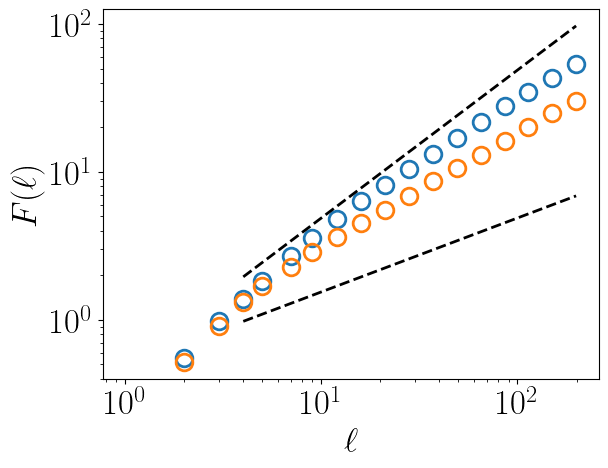

In [369]:
TRAJ=[]
L=np.loadtxt('Data/42003_2020_1605_MOESM5_ESM.txt')
Ncells=np.arange(13)*0
Ncells[1]+=1

for k in range(1,len(L)):
    if L[k][1]!=L[k-1][1]:
        Ncells[np.int64(L[k][0])]+=1
print(Ncells)

Seen=0
for m in range(1,13):
    Traj=[]
    for k in range(Ncells[m]):
        Traj.append([])
        Traj.append([])
        for l in range(200):
            Traj[-1].append(L[Seen+k*200+l][-1])
            Traj[-2].append(L[Seen+k*200+l][-2])
            #if np.abs(L[Seen+k*200+l][-1]-L[Seen+k*200+l-1][-1])>10:
                #print(Seen+k*200+l)
        #Traj[-1]=np.array(Traj[-1])-np.mean(np.array(Traj[-1][1:])-np.array(Traj[-1][:-1]))*np.arange(len(Traj[-1]))
        #Traj[-2]=np.array(Traj[-2])-np.mean(np.array(Traj[-2][1:])-np.array(Traj[-2][:-1]))*np.arange(len(Traj[-2]))
    Seen+=Ncells[m]*200
    TRAJ.append(Traj[:])

n_lis=np.int64(np.logspace(0,np.log10(200-1),20))
n_max=max(n_lis)

Traj=TRAJ[0]
def sig_n(y,n):
    N=len(y)
    y_n=[]
    for t in range(n_max,N,10):
       y_n.append(np.mean(y[t-n+1:t+1])) 
    y_n=np.array(y_n)
    return (np.sum((y[n_max::10]-y_n)**2),len(y_n))


SIG=np.zeros(len(n_lis))
YL=np.zeros(len(n_lis))
for k in range(len(Traj)):
  for i in range(len(n_lis)):
     n=n_lis[i]
     s,l= sig_n(Traj[k],n)
     SIG[i]+=s
     YL[i]+=l   
Sig=np.sqrt(SIG/YL)



plt.plot(n_lis,Sig,'o',markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)



n_lis=np.int64(np.logspace(0,np.log10(200-1),20))
n_max=max(n_lis)

Traj=TRAJ[11]
def sig_n(y,n):
    N=len(y)
    y_n=[]
    for t in range(n_max,N,10):
       y_n.append(np.mean(y[t-n+1:t+1])) 
    y_n=np.array(y_n)
    return (np.sum((y[n_max::10]-y_n)**2),len(y_n))


SIG=np.zeros(len(n_lis))
YL=np.zeros(len(n_lis))
for k in range(len(Traj)):
  for i in range(len(n_lis)):
     n=n_lis[i]
     s,l= sig_n(Traj[k],n)
     SIG[i]+=s
     YL[i]+=l   
Sig=np.sqrt(SIG/YL)



plt.plot(n_lis,Sig,'o',markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)




x,y=np.log10(n_lis)[5:],np.log10(Sig)[5:]
sol=curve_fit(modlin,x,y)
a,b=sol[0]
print(a)
plt.plot(10**x,10**modlin(x,1,b),'--k',linewidth=2)
plt.plot(10**x,10**modlin(x,1/2,b),'--k',linewidth=2)
plt.semilogx()
plt.semilogy()

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$\ell$',fontsize=25)
plt.ylabel(r'$F(\ell) $',fontsize=25)




# BONUS: telomere data
See paper Nature Comm, data given by someone to thank for (see Ref 26),  D. Krapf, M. Weiss, F. Taheri and
C. Selhuber-Unkel. However, as H=0.25 is small, it is hard to have a large number $n$ of visited sites (statistics is not incredible).

2000


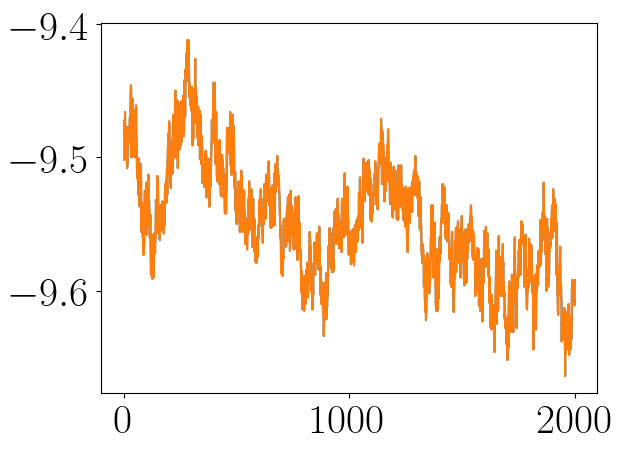

In [261]:
px=np.loadtxt('Data/telomers_xx.dat')
py=np.loadtxt('Data/telomers_yy.dat')

Values=px[0]
Dates=np.arange(1,len(Values)+1)

plt.plot(Values)

P=[]

H=0.5
for l in range(len(px)):
        T=np.int64(np.logspace(0.5,3,10))
        X2=np.zeros(len(T))
        Values=px[l]  
        for i in range(len(T)):
            k=T[i]
            Tk=[]
            for u in range(0,len(Values)-k):
                  Tk.append((Values[k+u]-Values[u])**2)
            X2[i]=np.mean(Tk)
        sol=curve_fit(modlin,np.log10(T),np.log10(X2))
        if abs(sol[0][0]-H)<0.05:
            P.append(np.array(px[l]))
 
        

for l in range(len(py)):
        T=np.int64(np.logspace(0.5,3,20))
        X2=np.zeros(len(T))
        Values=py[l]  
        for i in range(len(T)):
            k=T[i]
            Tk=[]
            for u in range(0,len(Values)-k):
                  Tk.append((Values[k+u]-Values[u])**2)
            X2[i]=np.mean(Tk)
        sol=curve_fit(modlin,np.log10(T),np.log10(X2))
        if abs(sol[0][0]-H)<0.05:
            P.append(np.array(py[l]))
 
print(P[0].size)
plt.plot(P[0])
plt.show()

1
1
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40]
[1.84131866] [[0.00063208]] [ 5  5  5  5  5  5  5  6  6  6  6  6  6  6  7  7  7  7  8  8  8  9  9  9
 10 10 11 11 12 12 13 13 14 15 16 16 17 18 19 20 21 23 24 25 27 28 30]


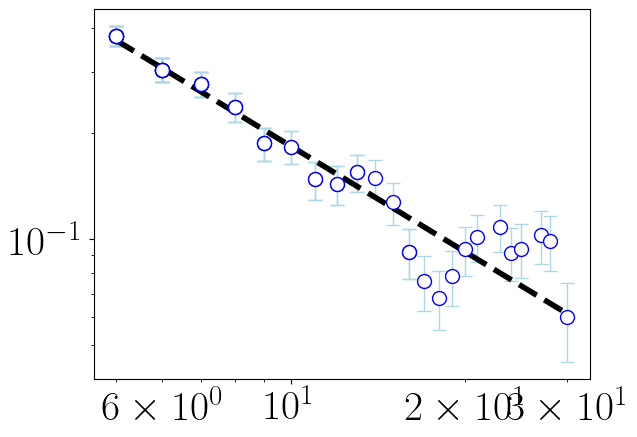

In [268]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter

fig, ax = plt.subplots(1, 1)

T=[]
Max=0
Values=P[0]

epochs=1500
print(len(Values)//epochs)
window=len(Values)//epochs
print(window)
for k in range(0,epochs):
    Size=Splitt(Values[k*window:])
    Max=max(len(Size),Max)
    T.append(Size[:])

    Pi_n=np.zeros(Max)
C_n=np.zeros(Max)

for t in T:
    for k in range(len(t)):
        Pi_n[k]+=t[k]
        C_n[k]+=1
p=Pi_n/C_n 
yerr=np.sqrt(p*(1-p)/C_n)*2
n=np.arange(4,Max)
Ind=np.int64(np.logspace(0.1,np.log10(Max)-.1,50))
Ind=Ind[p[Ind]>1.5*yerr[Ind]]
print(n)

# Main errorbar plot
plt.errorbar(n[Ind],p[Ind],yerr=yerr[Ind], fmt='o',                  # Circle marker only
    color='blue',
    ecolor='lightblue',            # Error bar color
    elinewidth=1,
    capsize=5,
    markersize=10,
    markerfacecolor='white',  # Hollow markers
    markeredgewidth=1)
A, var = curve_fit(finv, n[Ind], p[Ind], sigma=yerr[Ind])
plt.plot(n[Ind],A/n[Ind],'--k',linewidth=4)
print(A,var,n[Ind])

from matplotlib.ticker import LogLocator, LogFormatter,LogFormatterMathtext

ax.set_xscale('log')
ax.set_yscale('log')
# Major ticks at decades only
# ax.xaxis.set_major_locator(LogLocator(base=10.0))  
# ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10.0, labelOnlyBase=True))

plt.savefig('C:/Users/julie/Nextcloud/These/Data/persistence in exploration/Figures/Telomere.pdf', dpi=600, bbox_inches='tight')
plt.show()


